# K Nearest Neighbours

KNN stands for K-Nearest Neighbors and is a machine learning algorithm used for both classification and regression tasks. It is a non-parametric method, which means it does not make any assumptions about the underlying data distribution.

In the KNN algorithm, a prediction is made for a new data point by finding the k nearest data points in the training set, where k is a user-defined hyperparameter. The prediction is based on the majority class (for classification) or the average value (for regression) of the k-nearest neighbors.

The distance between data points is usually calculated using Euclidean distance, but other distance metrics can be used as well. KNN works well when the data has a simple structure and when the number of features is small, but can become computationally expensive as the dataset size and the number of features increases.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
titles = pd.read_csv('../../preprocessing/titles_preprocessed.csv')
credits = pd.read_csv('../../preprocessing/credits_preprocessed.csv')

In [4]:
titles.head()

,id,title,type,description,release_year,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity
0,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270
2,tm19424,Detour,MOVIE,"The life of Al Roberts, a pianist in a New Yor...",1945,66,"['thriller', 'drama', 'crime']",['US'],0.0,tt0037638,7.3,17233.0,7.757
3,tm112005,Marihuana,MOVIE,A young girl named Burma attends a beach party...,1936,57,"['crime', 'drama']",['US'],0.0,tt0026683,4.0,864.0,3.748
4,tm22806,Intolerance: Love's Struggle Throughout the Ages,MOVIE,"The story of a poor young woman, separated by ...",1916,197,"['history', 'drama']",['US'],0.0,tt0006864,7.7,15242.0,9.412


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# I'm going to use the K Nearest Neighbours method to classify the credits (actors and directors) into different groups:
# 1. High rated
# 2. Medium rated
# 3. Low rated
# based on their TMDB popularity.
# The ratings will be decided based on the average IMDB scores that each actors' movies/shows have.

In [8]:
# Preprocessing the data

# Merge the titles with the actors/directors dataset
merged_titles_credits = pd.merge(credits, titles, on='id', how='left')

# Calculate the average IMDb score and TMDB popularity for each person_id
person_scores_df = merged_titles_credits.groupby('person_id').agg({'imdb_score': 'mean', 'tmdb_popularity': 'mean'}).reset_index()
person_scores_df.rename(columns={'imdb_score': 'average_imdb_score', 'tmdb_popularity': 'average_tmdb_popularity'}, inplace=True)

# Merge the average IMDb scores with the actors/directors dataset
merged_df = pd.merge(credits, person_scores_df, on='person_id', how='left')

# Drop rows with missing average IMDb scores
merged_df.dropna(subset=['average_imdb_score'], inplace=True)

# Drop rows with missing average TMDB popularity
merged_df.dropna(subset=['average_tmdb_popularity'], inplace=True)

# IMDB score bins (0-4 - Low, 4-7 - Medium, 7-10 - High)
bins = [0, 4, 7, 10]
# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Bin the IMDb scores into different ranges and assign labels
merged_df['imdb_score_bin'] = pd.cut(merged_df['average_imdb_score'], bins=bins, labels=labels)

merged_df

,person_id,id,name,character,role,average_imdb_score,average_tmdb_popularity,imdb_score_bin
0,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,6.307692,4.784538,Medium-Rated
1,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,8.200000,8.647000,High-Rated
2,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR,7.400000,5.975500,High-Rated
3,28715,tm19248,Jim Farley,General Thatcher,ACTOR,6.033333,3.394500,Medium-Rated
4,27348,tm19248,Frederick Vroom,A Southern General,ACTOR,8.200000,8.647000,High-Rated
...,...,...,...,...,...,...,...,...
38898,321201,tm1055776,Piotr Trzaskalski,director,DIRECTOR,6.046369,0.898000,Medium-Rated
38899,28071,tm975981,Cher,Herself,ACTOR,7.600000,1.758000,High-Rated
38900,399383,tm975981,Nick Daley,Narrator,ACTOR,7.600000,1.758000,High-Rated
38901,1032862,tm975981,Jonathan Finnigan,director,DIRECTOR,7.600000,1.758000,High-Rated


In [9]:
# Split the dataset into features and target
X = merged_df['average_tmdb_popularity'] # Features: TMDB popularity
Y = merged_df['imdb_score_bin'] # Target: IMDb score bin from merged dataset

# Splitting the data into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=41)

In [10]:
X_train

12662     4.855000
31356     6.336000
37665     0.910000
24266    10.365333
3072      2.462667
           ...    
27264    29.006500
31823     4.209000
20541    16.285000
935       2.200500
34984     1.896000
Name: average_tmdb_popularity, Length: 28879, dtype: float64

In [11]:
# Normalizing TMDB popularity scores
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train.values.reshape(-1,1))

X_train = scaler.transform(X_train.values.reshape(-1,1))
X_test = scaler.transform(X_test.values.reshape(-1,1))

In [12]:
X_test

array([[0.00242402],
       [0.00405994],
       [0.00231547],
       ...,
       [0.00765532],
       [0.000859  ],
       [0.00011062]])

In [13]:
# Checking for outliers
from scipy import stats

z_scores = stats.zscore(merged_df['average_tmdb_popularity'])
outliers = merged_df[abs(z_scores) > 3]

outliers

,person_id,id,name,character,role,average_imdb_score,average_tmdb_popularity,imdb_score_bin
19508,11454,tm18563,Peter Bryant,Black TV Reporter,ACTOR,6.35,496.2475,Medium-Rated
20048,85045,ts15312,Trevor Noah,Self - Host,ACTOR,7.80,380.6175,High-Rated
20049,2002880,ts15312,Michael Kosta,Self - Correspondent,ACTOR,7.60,375.0625,High-Rated
20050,13515,ts15312,Desi Lydic,Self - Correspondent,ACTOR,7.90,392.9535,High-Rated
20823,16935,tm113286,Neal McDonough,Lieutenant Hawk,ACTOR,7.05,454.7095,High-Rated
...,...,...,...,...,...,...,...,...
38373,1729839,tm1151009,Becki Hayes,Monitor,ACTOR,5.80,446.8970,Medium-Rated
38374,2290859,tm1151009,Millie Rose Evans,Nurse,ACTOR,5.80,446.8970,Medium-Rated
38375,657183,tm1151009,Christian Adam,Nerdy Kid,ACTOR,5.80,446.8970,Medium-Rated
38376,2290727,tm1151009,Esmond C. Pickett,Garden Orderly,ACTOR,5.80,446.8970,Medium-Rated


In [14]:
# 230 is not that many instances compared to 38506 in total, so we will leave them.

In [15]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))

In [16]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [17]:
# Predicting results 
Y_pred = knn.predict(X_test)

# Evaluating the KNN model
report(knn, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.91      0.87      0.89      5065
   Low-Rated       0.84      0.84      0.84      1071
Medium-Rated       0.96      0.97      0.97     22743

    accuracy                           0.95     28879
   macro avg       0.90      0.89      0.90     28879
weighted avg       0.95      0.95      0.95     28879



### Classification report - train set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 91% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 96% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 84% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 87% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 97% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 84% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.89
* **Medium-Rated class** - 0.97
* **Low-Rated class** - 0.84

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 5065
* **Medium-Rated class** - 22743
* **Low-Rated class** - 1071


### <u> Accuracy: 95% </u>

In [18]:
report(knn, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.85      0.82      0.83      1764
   Low-Rated       0.73      0.81      0.77       336
Medium-Rated       0.95      0.95      0.95      7527

    accuracy                           0.92      9627
   macro avg       0.84      0.86      0.85      9627
weighted avg       0.92      0.92      0.92      9627



### Classification report - test set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 85% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 95% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 73% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 82% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 95% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 81% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.83
* **Medium-Rated class** - 0.95
* **Low-Rated class** - 0.77

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 1764
* **Medium-Rated class** - 7527
* **Low-Rated class** - 336


### <u> Accuracy: 92% </u>

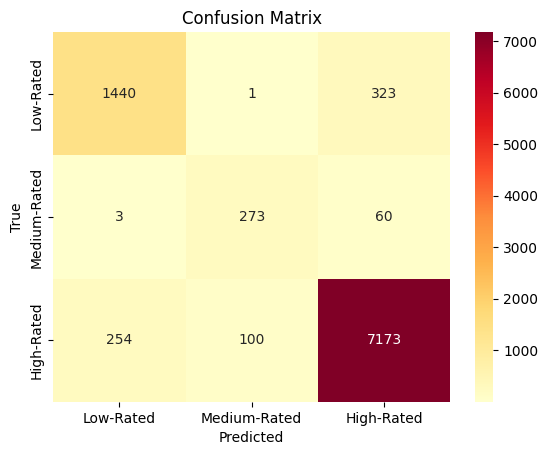

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
cm

array([[1440,    1,  323],
       [   3,  273,   60],
       [ 254,  100, 7173]], dtype=int64)

### Confusion matrix

##### For the Low-Rated class:
* 1440 samples were correctly predicted as Low-Rated
* 1 sample was predicted as Medium-Rated but was actually Low-Rated
* 323 samples were predicted as High-Rated but were actually Low-Rated

##### For the Medium-Rated class:
* 3 samples were predicted as Low-Rated but were actually Medium-Rated
* 273 samples were correctly predicted as Medium-Rated 
* 60 samples were predicted as High-Rated but were actually Medium-Rated 

##### For the High-Rated class:
* 254 samples were predicted as Low-Rated but were actually High-Rated
* 100 samples were predicted as Medium-Rated but were actually High-Rated
* 7173 samples were correctly predicted as High-Rated


# GridSearchCV


GridSearchCV is a technique for hyperparameter tuning in machine learning, which involves searching for the best set of hyperparameters that result in the optimal performance of a model.

In GridSearchCV, a set of hyperparameters and their respective values are predefined, and the algorithm evaluates the performance of the model for each combination of these hyperparameters. The evaluation is typically done using cross-validation, where the dataset is split into several folds, and the model is trained on a portion of the data and tested on the remaining part. This helps to avoid overfitting and provides a more reliable estimate of the model's performance.

GridSearchCV exhaustively searches over all the possible hyperparameter combinations, and returns the combination that produces the best performance on the validation data. The performance metric used for evaluation can be specified by the user, and can vary depending on the problem at hand.

In [21]:
# gini: measures impurity by calculating the probability of misclassifying a randomly chosen data point in that node
# entropy: measures impurity by calculating the entropy of the class
# This model will try both criterions to decide on how to split the decision tree

# The grid search will also try different values of the maximum depth of the decision tree (2, 4, 6, 8)
params = {'criterion': ['gini', 'entropy'], 
          'max_depth': [2, 4, 6, 8]
         }

params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

In [22]:
from sklearn.model_selection import GridSearchCV

estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)
estimator.fit(X_train, Y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.893 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.898 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.890 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.894 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.890 total time=   0.1s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.885 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 6/6] END n_neigh

[CV 3/6] END n_neighbors=30, p=1, weights=uniform;, score=0.850 total time=   0.1s
[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.853 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.849 total time=   0.1s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.844 total time=   0.1s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.973 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.961 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.845 total time=   0.1s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.859 total time=   0.1

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [25]:
Y_pred = estimator.predict(X_test)

In [26]:
# Let's see what the best parameters are based on the estimator:

estimator.best_params_

{'n_neighbors': 35, 'p': 1, 'weights': 'distance'}

In [27]:
# What about the best score?

estimator.best_score_

0.9693548548133369

In [28]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.99      0.98      0.98      5065
   Low-Rated       0.90      0.95      0.92      1071
Medium-Rated       0.99      0.99      0.99     22743

    accuracy                           0.99     28879
   macro avg       0.96      0.97      0.97     28879
weighted avg       0.99      0.99      0.99     28879



### Classification report - train set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 99% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 99% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 90% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 98% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 99% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 95% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.98
* **Medium-Rated class** - 0.99
* **Low-Rated class** - 0.92

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 5065
* **Medium-Rated class** - 22743
* **Low-Rated class** - 1071


### <u> Accuracy: 99% </u>

In [29]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.96      0.94      0.95      1764
   Low-Rated       0.85      0.89      0.87       336
Medium-Rated       0.98      0.98      0.98      7527

    accuracy                           0.97      9627
   macro avg       0.93      0.94      0.93      9627
weighted avg       0.97      0.97      0.97      9627



### Classification report - test set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 96% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 98% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 85% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 94% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 98% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 89% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.95
* **Medium-Rated class** - 0.98
* **Low-Rated class** - 0.87

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 1764
* **Medium-Rated class** - 7527
* **Low-Rated class** - 336


### <u> Accuracy: 97% </u>

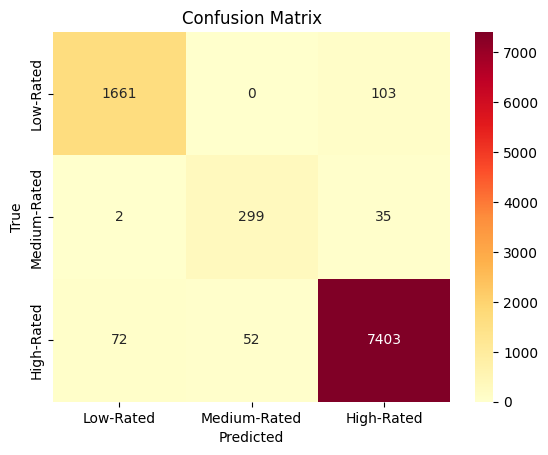

In [30]:
# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Confusion matrix

##### For the Low-Rated class:
* 1661 samples were correctly predicted as Low-Rated
* 0 samples were predicted as Medium-Rated but were actually Low-Rated
* 103 samples were predicted as High-Rated but were actually Low-Rated

##### For the Medium-Rated class:
* 2 samples were predicted as Low-Rated but were actually Medium-Rated
* 299 samples were correctly predicted as Medium-Rated 
* 35 samples were predicted as High-Rated but were actually Medium-Rated 

##### For the High-Rated class:
* 72 samples were predicted as Low-Rated but were actually High-Rated
* 52 samples were predicted as Medium-Rated but were actually High-Rated
* 7403 samples were correctly predicted as High-Rated


# Bagging Classifier 

The bagging classifier, also known as bootstrap aggregating, is a type of ensemble learning algorithm that combines multiple decision tree models to improve the overall performance of the classification task. Bagging works by creating multiple subsets of the original training data set by randomly selecting observations with replacement, and training a separate decision tree model on each of these subsets.

During the prediction phase, each decision tree model produces its own classification result, and the final classification is determined by aggregating the results of all the individual models. This aggregation can be done by taking the majority vote, where the classification with the most votes is chosen as the final prediction.

In [31]:
from sklearn.ensemble import BaggingClassifier

baggingKNN = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKNN.fit(X_train, Y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)

In [32]:
Y_pred = baggingKNN.predict(X_test)

In [33]:
report(baggingKNN, X_train, Y_train)

Classification report for model BaggingClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.92      0.86      0.89      5065
   Low-Rated       0.85      0.85      0.85      1071
Medium-Rated       0.96      0.98      0.97     22743

    accuracy                           0.95     28879
   macro avg       0.91      0.90      0.90     28879
weighted avg       0.95      0.95      0.95     28879



### Classification report - train set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 92% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 96% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 84% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 87% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 98% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 86% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.89
* **Medium-Rated class** - 0.97
* **Low-Rated class** - 0.85

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 5065
* **Medium-Rated class** - 22743
* **Low-Rated class** - 1071


### <u> Accuracy: 95% </u>

In [34]:
report(baggingKNN, X_test, Y_test, "test")

Classification report for model BaggingClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

  High-Rated       0.86      0.81      0.83      1764
   Low-Rated       0.73      0.81      0.77       336
Medium-Rated       0.95      0.96      0.95      7527

    accuracy                           0.92      9627
   macro avg       0.85      0.86      0.85      9627
weighted avg       0.92      0.92      0.92      9627



### Classification report - test set

##### Precision: 
*true positives : (true positives + false positives)*

* **High-Rated class** - 85% of the predicted High-Rated instances were actually High-Rated.
* **Medium-Rated class** - 95% of the predicted Medium-Rated instances were actually Medium-Rated.
* **Low-Rated class** - 74% of the predicted Low-Rated instances were actually Low-Rated.

##### Recall
*true positives : (true positives + false negatives)*

* **High-Rated class** - The model correctly identified 81% of the actual High-Rated instances.
* **Medium-Rated class** - The model correctly identified 96% of the actual Medium-Rated instances.
* **Low-Rated class** - The model correctly identified 81% of the actual Low-Rated instances.

##### F1-score
*harmonic mean of precision and recall*

* **High-Rated class** - 0.83
* **Medium-Rated class** - 0.95
* **Low-Rated class** - 0.77

##### Support
*the number of samples or instances of each class in the test dataset*

* **High-Rated class** - 1764
* **Medium-Rated class** - 7527
* **Low-Rated class** - 336


### <u> Accuracy: 92% </u>

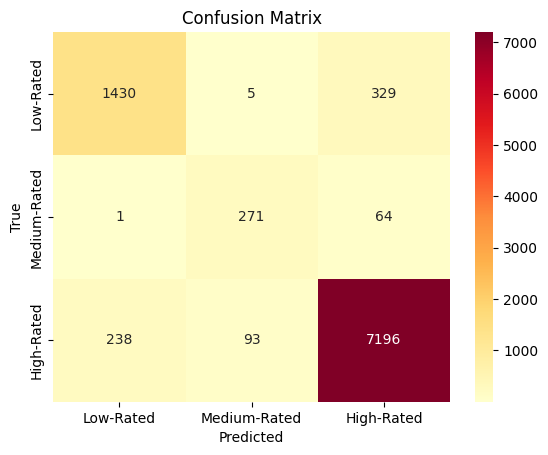

In [35]:
# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Class labels
labels = ['Low-Rated', 'Medium-Rated', 'High-Rated']  

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Confusion matrix

##### For the Low-Rated class:
* 1427 samples were correctly predicted as Low-Rated
* 2 sample was predicted as Medium-Rated but was actually Low-Rated
* 335 samples were predicted as High-Rated but were actually Low-Rated

##### For the Medium-Rated class:
* 4 samples were predicted as Low-Rated but were actually Medium-Rated
* 272 samples were correctly predicted as Medium-Rated 
* 60 samples were predicted as High-Rated but were actually Medium-Rated 

##### For the High-Rated class:
* 243 samples were predicted as Low-Rated but were actually High-Rated
* 92 samples were predicted as Medium-Rated but were actually High-Rated
* 7192 samples were correctly predicted as High-Rated


# Model Comparison

After training and testing our models, we want to estimate which one solves the classification problem best. Since we can't decide solely based on the model precision, we're going to compare them using the ROC curve.


## The ROC curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between fpr and tpr. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different classification thresholds.


* False Positive Rate (fpr) represents the ratio of the number of false positive predictions to the total number of actual negative samples. It is defined as FP:(FP+TN), where FP is the number of false positives and TN is the number of true negatives.


* True Positive Rate (tpr), also known as sensitivity or recall, represents the ratio of the number of true positive predictions to the total number of actual positive samples. It is defined as TP:(TP+FN), where TP is the number of true positives and FN is the number of false negatives.

The AUC (Area Under the Curve) is a metric that represents the overall performance of the model in discriminating between positive and negative classes. It measures the area under the ROC curve, with values ranging from 0 to 1, where a score of 0.5 represents a random classifier and a score of 1 represents a perfect classifier.
In general, **the higher the AUC, the better the performance of the model.**

In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
models = [knn, estimator, baggingKNN]
model_names = ["KNN", "GridSearchCV", "BaggingClassifier"]
colors = ["green", "blue", "red"]

### Low Rated class 

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.977 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.977 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.978 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.975 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.975 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.971 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.989 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.990 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 6/6] END n_neigh

[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.961 total time=   0.1s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.964 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.993 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.990 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.991 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.989 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.963 total time=   0.1s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.966 total time=   0.1s
[CV 3/6] END n_neighbors=30, p=2, weights=uniform;, score=0.963 total time=   0.1

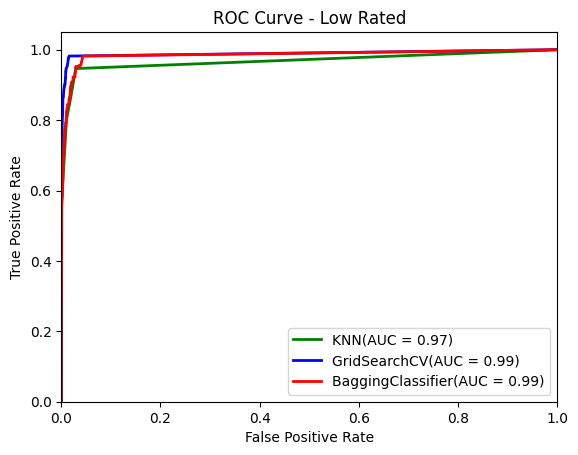

In [38]:
# Choose Low-rated as the positive class
pos_class = "Low-Rated" 

# Combine the other two classes into a single negative class
neg_class = ["Medium-Rated", "High-Rated"]

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Low Rated')
plt.legend(loc="lower right")
plt.show()

### Medium-Rated class

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.892 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.895 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.889 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.887 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 6/6] END n_neigh

[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.852 total time=   0.1s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.848 total time=   0.1s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.973 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.969 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.970 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.968 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.961 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.845 total time=   0.1s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.858 total time=   0.1s
[CV 3/6] END n_neighbors=30, p=2, weights=uniform;, score=0.851 total time=   0.1

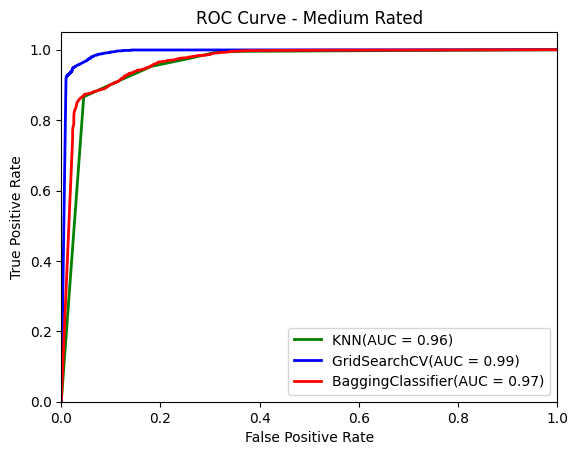

In [39]:
# Choose Medium-rated as the positive class
pos_class = "Medium-Rated" 
# Combine the other two classes into a single negative class
neg_class = ["Low-Rated", "High-Rated"] 

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Medium Rated')
plt.legend(loc="lower right")
plt.show()

### High-Rated class

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.915 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.924 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.921 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.923 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.916 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.914 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.977 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.980 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.981 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.979 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.977 total time=   0.0s
[CV 6/6] END n_neigh

[CV 3/6] END n_neighbors=30, p=1, weights=uniform;, score=0.888 total time=   0.1s
[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.891 total time=   0.1s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.884 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.880 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.979 total time=   0.0s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.980 total time=   0.0s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.980 total time=   0.0s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.979 total time=   0.0s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.977 total time=   0.0s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.972 total time=   0.0s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.883 total time=   0.2s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.892 total time=   0.1

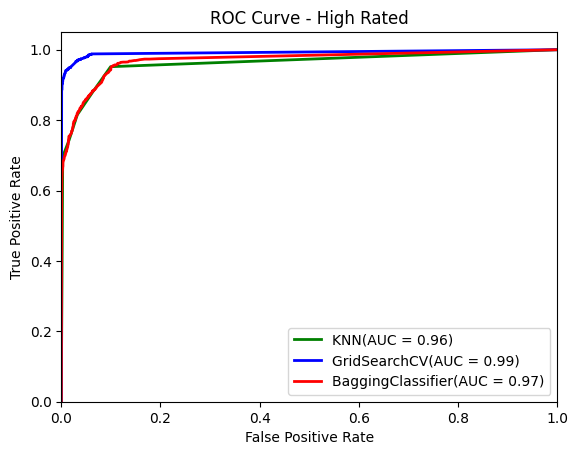

In [40]:
# Choose High-rated as the positive class
pos_class = "High-Rated" 
# Combine the other two classes into a single negative class
neg_class = ["Low-Rated", "Medium-Rated"] 

# Convert labels to binary format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    # Train a classifier on the training data
    model.fit(X_train, y_train_bin)
    
    # Make predictions on the test data
    y_pred = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and area under the curve (AUC)
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Rated')
plt.legend(loc="lower right")
plt.show()

Even though GridSearchCV and BaggingClassifier are similar on the Low-Rated instances and have the same AUC, GridSearchCV outperforms it when it comes to Medium and High-Rated classifications.

We conclude that GridSearchCV is the most efficient and precise classifier.

In [41]:
# Exporting the data to other files (decision trees...)
import pickle

with open('data.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, Y_train, Y_test), f)